In [301]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report



In [144]:
df = pd.read_csv('Wine.csv')
df


,fixed acid,volatile acid,citric acid,residual sugar,chlorid,free sulfur dioxide,sum of sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# EDA

In [145]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fixed acid             1143 non-null   float64
 1   volatile acid          1143 non-null   float64
 2   citric acid            1143 non-null   float64
 3   residual sugar         1143 non-null   float64
 4   chlorid                1143 non-null   float64
 5   free sulfur dioxide    1143 non-null   float64
 6   sum of sulfur dioxide  1143 non-null   float64
 7   density                1143 non-null   float64
 8   pH                     1143 non-null   float64
 9   sulphates              1143 non-null   float64
 10  alcohol                1143 non-null   float64
 11  quality                1143 non-null   int64  
 12  Id                     1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


fixed acid               0
volatile acid            0
citric acid              0
residual sugar           0
chlorid                  0
free sulfur dioxide      0
sum of sulfur dioxide    0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
Id                       0
dtype: int64

In [146]:
df.describe()

,fixed acid,volatile acid,citric acid,residual sugar,chlorid,free sulfur dioxide,sum of sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [147]:
df.drop(['Id'],inplace=True, axis = 1)

In [148]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [149]:
def feature_viz(feature):
    plt.figure(figsize=(15,8))
    plt.title(f'{feature} hist plot')
    plt.subplot(1,3,1)
    df[feature].plot(kind='hist')

    plt.subplot(1,3,2)
    plt.title(f'{feature} box plot')
    sns.boxplot(df[feature])
    

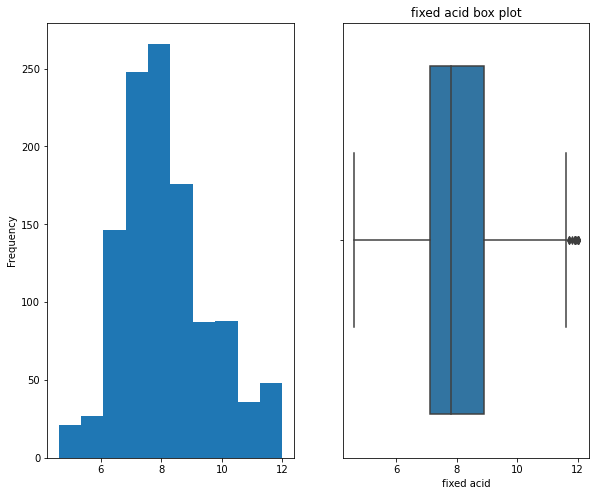

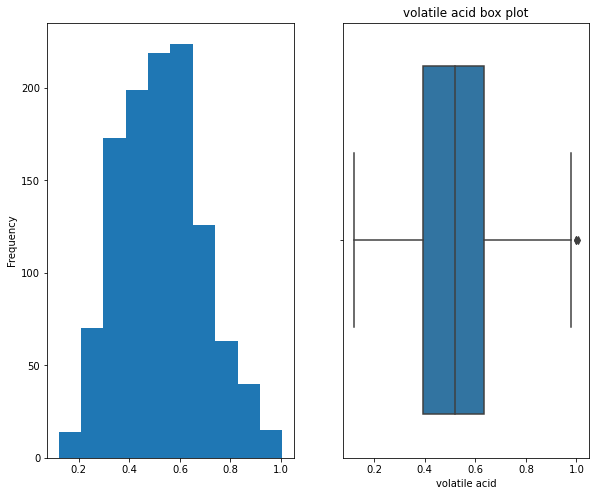

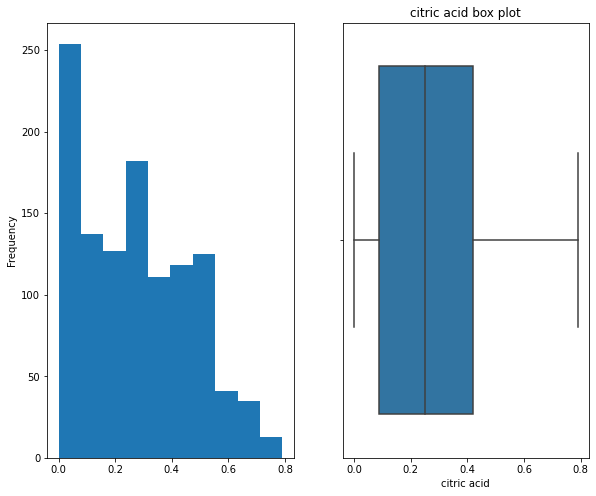

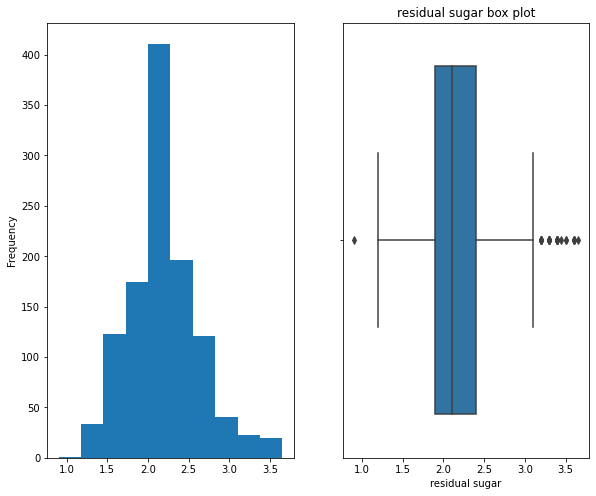

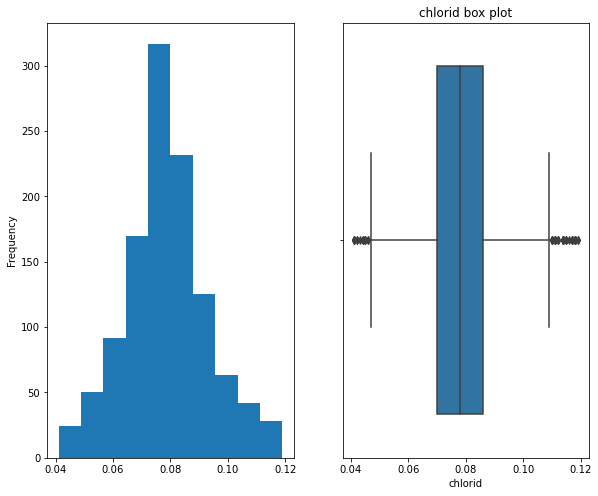

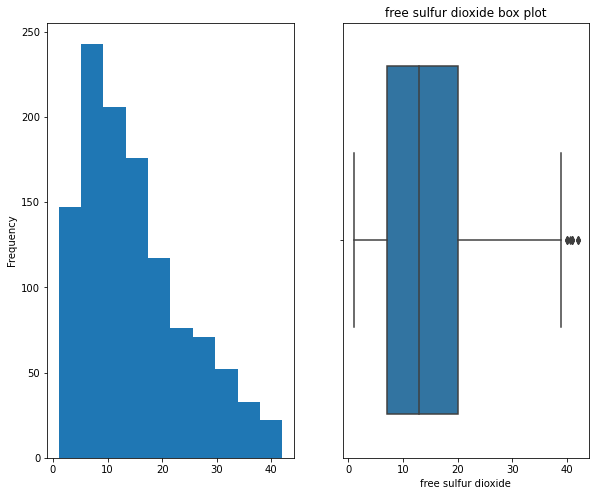

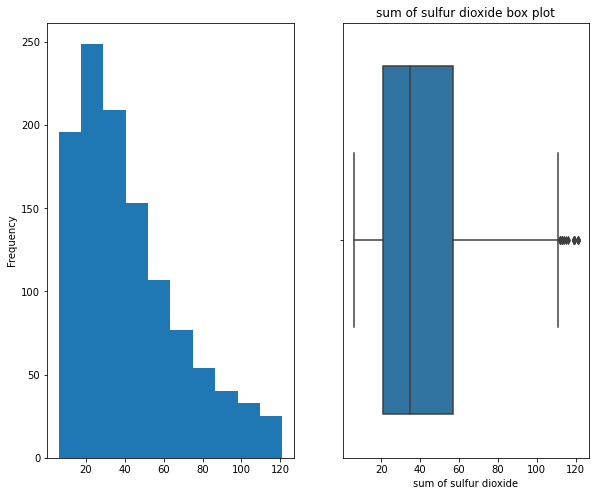

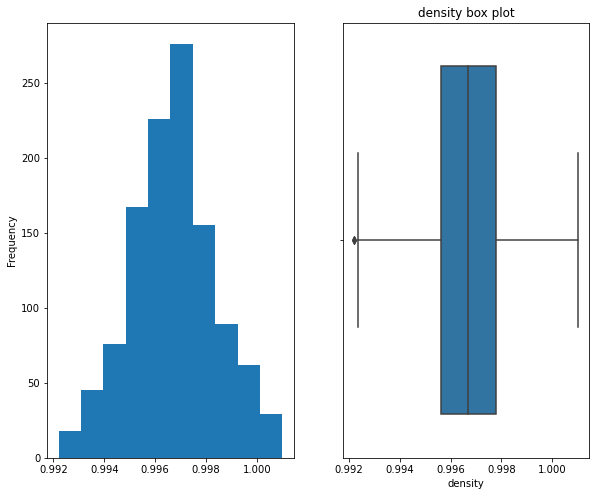

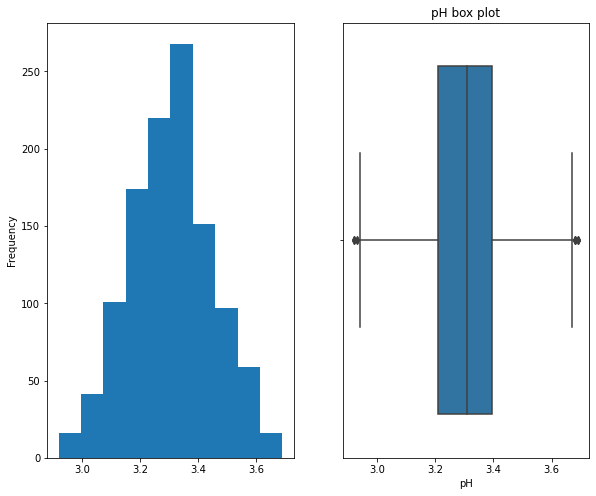

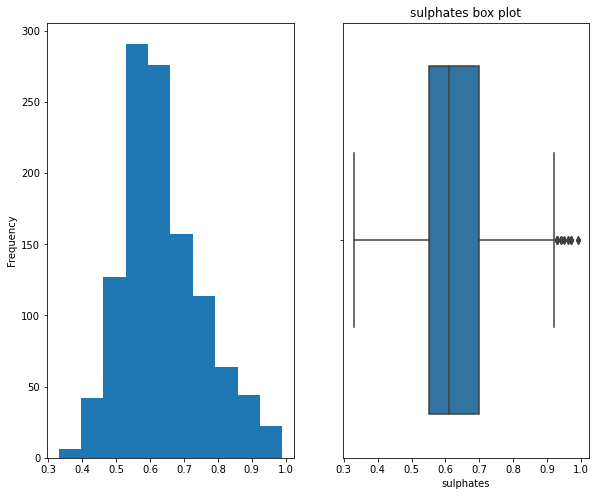

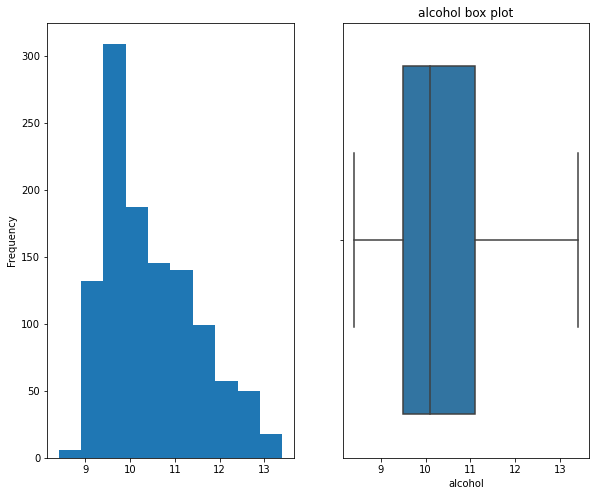

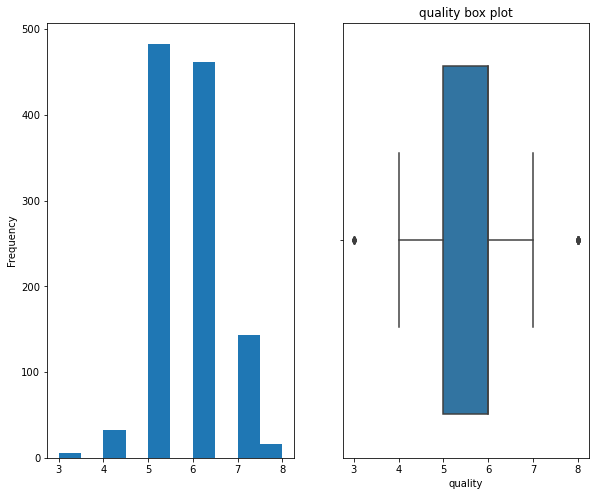

In [334]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

for i in df.columns:
    feature_viz(i)

In [151]:
df.corr().style.background_gradient(cmap='Reds')

,fixed acid,volatile acid,citric acid,residual sugar,chlorid,free sulfur dioxide,sum of sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acid,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acid,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorid,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
sum of sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


<function matplotlib.pyplot.show(close=None, block=None)>

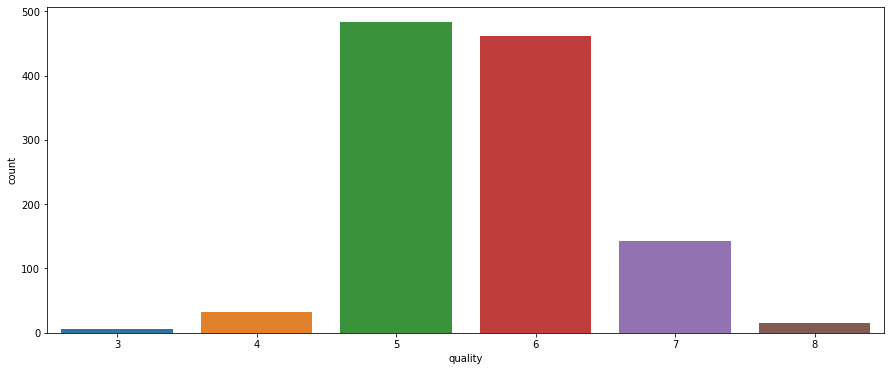

In [336]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['quality'])
plt.show

Determining and treatment of outliers

In [152]:

for x in ['fixed acid','volatile acid','citric acid','residual sugar','chlorid','free sulfur dioxide','sum of sulfur dioxide',
         'density','pH','sulphates','alcohol']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [153]:
df.isnull().sum()

fixed acid                44
volatile acid             14
citric acid                1
residual sugar           110
chlorid                   77
free sulfur dioxide       18
sum of sulfur dioxide     40
density                   36
pH                        20
sulphates                 43
alcohol                   12
quality                    0
dtype: int64

In [154]:
fill = ['fixed acid','volatile acid','citric acid','residual sugar','chlorid','free sulfur dioxide','sum of sulfur dioxide',
         'density','pH','sulphates','alcohol']

In [155]:
for i in fill:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

In [156]:
df.isnull().sum()

fixed acid               0
volatile acid            0
citric acid              0
residual sugar           0
chlorid                  0
free sulfur dioxide      0
sum of sulfur dioxide    0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

# Train-Test Split

In [157]:
x = df.drop(['quality'],1)
y = y = df['quality']

In [175]:
#Imbalaced Dataset to balanced dataset
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state = 1)
x, y = os.fit_resample(x,y)

In [176]:
#Scaling
sc = StandardScaler()
x = sc.fit_transform(x)

In [337]:
#PCA
pca = PCA(n_components = 0.97)
pca.fit_transform(x)

array([[-1.71629698, -1.58823586, -0.41785378, ..., -0.31804582,
         0.43067537, -0.08625779],
       [-0.34605562, -1.95449251,  1.74355986, ...,  1.27926473,
        -1.29890684, -0.71747955],
       [-0.45641568, -1.55677004,  0.60125242, ...,  0.78289508,
        -0.89883209, -0.15345896],
       ...,
       [-3.83080613,  2.53807432,  1.37102053, ...,  2.26820583,
         0.29000019,  1.24641409],
       [ 2.39775062,  0.70149732, -1.05518136, ..., -0.25595941,
        -0.02806744,  0.04309057],
       [-0.15877619,  0.92279885, -1.17371528, ..., -0.95615133,
        -0.63867185,  0.35632256]])

In [188]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [321]:
model_comparison = {}

# Logistic Regression

In [322]:
Logistic = LogisticRegression(penalty = 'l1', solver='liblinear', random_state = 42)
Logistic.fit(x_train, y_train)
y_pred_logistic = Logistic.predict(x_test)

In [323]:
print('Logistic train score:', Logistic.score(x_train,y_train))
print('Logistic test score:', Logistic.score(x_test,y_test))

Logistic train score: 0.4935897435897436
Logistic test score: 0.496551724137931


In [325]:
print(classification_report(y_test,y_pred_logistic))
model_comparison['Logistic'] = [Logistic.score(x_train,y_train), accuracy_score(y_test,y_pred_logistic)]

              precision    recall  f1-score   support

           3       0.68      0.84      0.75       159
           4       0.36      0.29      0.32       148
           5       0.47      0.52      0.49       145
           6       0.45      0.24      0.32       147
           7       0.38      0.32      0.35       136
           8       0.51      0.73      0.60       135

    accuracy                           0.50       870
   macro avg       0.47      0.49      0.47       870
weighted avg       0.48      0.50      0.48       870



# KNN 

In [230]:
error_rate = []
for i in range(1,60):
    
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    pred_i = KNN.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

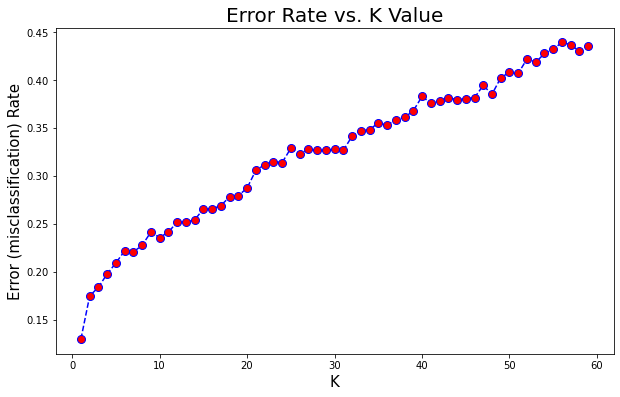

In [231]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

In [244]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(x_train, y_train)
y_pred_knn = KNN.predict(x_test)

In [245]:
print('KNN train score:', KNN.score(x_train,y_train))
print('KNN test score:', KNN.score(x_test,y_test))

KNN train score: 0.9013806706114399
KNN test score: 0.8160919540229885


In [332]:
print(classification_report(y_test,y_pred_knn))


              precision    recall  f1-score   support

           3       0.98      1.00      0.99       159
           4       0.85      1.00      0.92       148
           5       0.64      0.56      0.60       145
           6       0.61      0.44      0.51       147
           7       0.76      0.90      0.82       136
           8       0.96      1.00      0.98       135

    accuracy                           0.82       870
   macro avg       0.80      0.82      0.80       870
weighted avg       0.80      0.82      0.80       870



In [331]:
model_comparison['KNN'] = [KNN.score(x_train,y_train), accuracy_score(y_test,y_pred_knn)]

# Random Forest

In [211]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 30, num = 6)]


In [200]:
param_grid ={ 'n_estimators': n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth
               
                 }
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 22, 26, 30]}


In [205]:
Random_Forest_Grid = GridSearchCV(estimator = Random_Forest, param_grid = param_grid, cv = 5
                                 )

In [206]:
Random_Forest_Grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 14, 18, 22, 26, 30],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [207]:
Random_Forest_Grid.best_params_

{'max_depth': 26, 'max_features': 'auto', 'n_estimators': 50}

In [208]:
y_pred_random = Random_Forest_Grid.predict(x_test)

In [209]:
print('Random_Forest train score:', Random_Forest_Grid.score(x_train,y_train))
print('Random_Forest test score:', Random_Forest_Grid.score(x_test,y_test))

Random_Forest train score: 1.0
Random_Forest test score: 0.9080459770114943


In [327]:
print(classification_report(y_test,y_pred_random))
model_comparison['Random Forest'] = [Random_Forest_Grid.score(x_train,y_train),accuracy_score(y_test,y_pred_random)]

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       159
           4       0.99      1.00      0.99       148
           5       0.75      0.80      0.78       145
           6       0.78      0.68      0.72       147
           7       0.92      0.97      0.95       136
           8       1.00      1.00      1.00       135

    accuracy                           0.91       870
   macro avg       0.91      0.91      0.91       870
weighted avg       0.91      0.91      0.91       870



# Gradient Boosting

In [273]:
Gradient = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=1,max_features=8 )
Gradient.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=8, n_estimators=300,
                           random_state=1)

In [274]:
print('Gradient Boosting train score:', Gradient.score(x_train,y_train))
print('Gradient Boosting test score:', Gradient.score(x_test,y_test))

Gradient Boosting train score: 0.9763313609467456
Gradient Boosting test score: 0.864367816091954


In [328]:
y_pred_gradient = Gradient.predict(x_test)
print(classification_report(y_test, y_pred_gradient))
model_comparison['Gradient Boosting'] = [Gradient.score(x_train,y_train),accuracy_score(y_test,y_pred_gradient)]

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       159
           4       0.95      1.00      0.98       148
           5       0.67      0.71      0.69       145
           6       0.67      0.54      0.60       147
           7       0.86      0.93      0.89       136
           8       1.00      1.00      1.00       135

    accuracy                           0.86       870
   macro avg       0.86      0.86      0.86       870
weighted avg       0.86      0.86      0.86       870



In [333]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df.columns = ['Accuracy:train', 'Accuracy:test']
model_comparison_df = model_comparison_df.sort_values('Accuracy:test', ascending=False)
model_comparison_df

,Accuracy:train,Accuracy:test
Random Forest,1.000000,0.908046
Gradient Boosting,0.976331,0.864368
KNN,0.901381,0.816092
Logistic,0.493590,0.496552
